In [8]:
import librosa
import soundfile as sf
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
filename = librosa.example('nutcracker')


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename, offset=20,duration=30)


In [3]:
print(y.shape)
print(type(y))
print(sr)
print(type(sr))

(661500,)
<class 'numpy.ndarray'>
22050
<class 'int'>


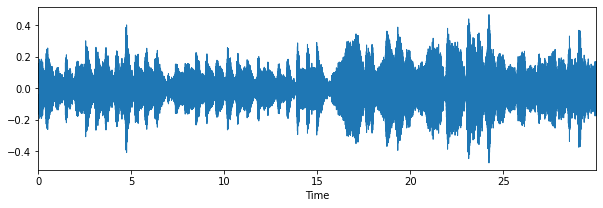

In [4]:
plt.figure(figsize=(10,3))
librosa.display.waveplot(y,sr=sr)

In [5]:
# First load the file
audio, sr = librosa.load(filename, offset=20,duration=30)

# Get number of samples for 2 seconds; replace 2 by any number
buffer = 30 * sr

samples_total = len(audio)
samples_wrote = 0
counter = 1

#check if the buffer is not exceeding total samples 
if buffer > (samples_total - samples_wrote):
    buffer = samples_total - samples_wrote

block = audio[samples_wrote : (samples_wrote + buffer)]
out_filename = "temp.wav"

# Write 30 second segment
sf.write(out_filename, block, sr)
counter += 1
samples_wrote += buffer

In [6]:
y, sr = librosa.load(out_filename)

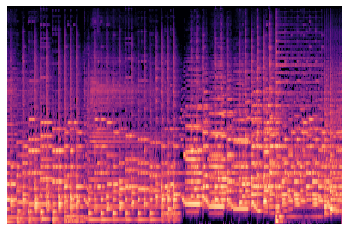

In [37]:
mel_signal = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
# plt.figure(figsize=(8, 5))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')

plt.axis('off')
plt.savefig('testwave.png', bbox_inches='tight', transparent=True, pad_inches=0)
# plt.colorbar(label='dB')
# plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
# plt.xlabel('Time', fontdict=dict(size=15))
# plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

(217, 334, 3)


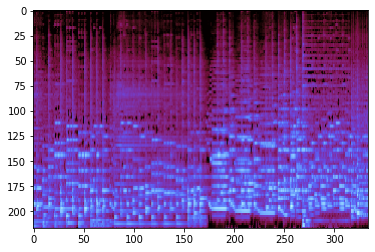

In [38]:
pic = cv2.imread("testwave.png")
print(pic.shape)
plt.imshow(pic)

(221, 339, 3)


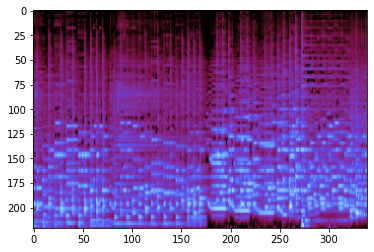

In [39]:
resized_pic = cv2.resize(pic, (339,221))
print(resized_pic.shape)
plt.imshow(resized_pic)

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
%cd drive/MyDrive

/content/drive/MyDrive
